<a href="https://colab.research.google.com/github/AnonymousJP04/LicensePlateRecognition/blob/main/ObjectLocalization_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Set the number of images to generate
num_images = 1000

# Set the size of the images
image_size = 64

# Create an empty list to store the images and labels
data = []

# Generate the images and labels
for i in range(num_images):
    # Create a blank image
    image = np.zeros((image_size, image_size, 3), dtype=np.uint8)

    # Generate a random shape
    shape = np.random.randint(0, 3)
    if shape == 0:
        # Generate a circle
        center = (np.random.randint(0, image_size), np.random.randint(0, image_size))
        radius = np.random.randint(10, 20)
        color = (255, 255, 255)
        cv2.circle(image, center, radius, color, -1)
    elif shape == 1:
        # Generate a triangle
        pt1 = (np.random.randint(0, image_size), np.random.randint(0, image_size))
        pt2 = (np.random.randint(0, image_size), np.random.randint(0, image_size))
        pt3 = (np.random.randint(0, image_size), np.random.randint(0, image_size))
        color = (255, 255, 255)
        cv2.fillConvexPoly(image, np.array([pt1, pt2, pt3]), color)
    else:
        # Generate a rectangle
        pt1 = (np.random.randint(0, image_size), np.random.randint(0, image_size))
        pt2 = (np.random.randint(pt1[0], image_size), np.random.randint(pt1[1], image_size))
        color = (255, 255, 255)
        cv2.rectangle(image, pt1, pt2, color, -1)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Normalize the grayscale image
    gray_image = gray_image.astype("float32") / 255.0

    # Find the coordinates of the bounding box
    contours, hierarchy = cv2.findContours(gray_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
    x_center = (x + w/2) / image_size
    y_center = (y + h/2) / image_size
    width = w / image_size
    height = h / image_size

    # Add the image and label to the list
    data.append((gray_image, (x_center, y_center, width, height)))



In [4]:
# Split the data into training and testing sets
train_data = data[:800]
test_data = data[800:]

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.Conv2D(16, (2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation=None),
])

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='mse')

# Prepare training data
train_images = np.array([item[0] for item in train_data])
train_labels = np.array([item[1] for item in train_data])

# Prepare testing data
test_images = np.array([item[0] for item in test_data])
test_labels = np.array([item[1] for item in test_data])

# Train the model
model.fit(train_images, train_labels, epochs=24, batch_size=40)

# Evaluate the model on the testing data
test_loss = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 0.1750
Epoch 2/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 313ms/step - loss: 0.0318
Epoch 3/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - loss: 0.0175
Epoch 4/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - loss: 0.0120
Epoch 5/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - loss: 0.0104
Epoch 6/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 386ms/step - loss: 0.0088
Epoch 7/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - loss: 0.0084
Epoch 8/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 305ms/step - loss: 0.0090
Epoch 9/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - loss: 0.0078
Epoch 10/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - loss: 0.0077
Epoch 11/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - loss: 0.0071
Epoch 12/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - loss: 0.0068
Epoch 13/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - loss: 0.0065
Epoch 14/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - loss: 0.0065
Epoch 15/24
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


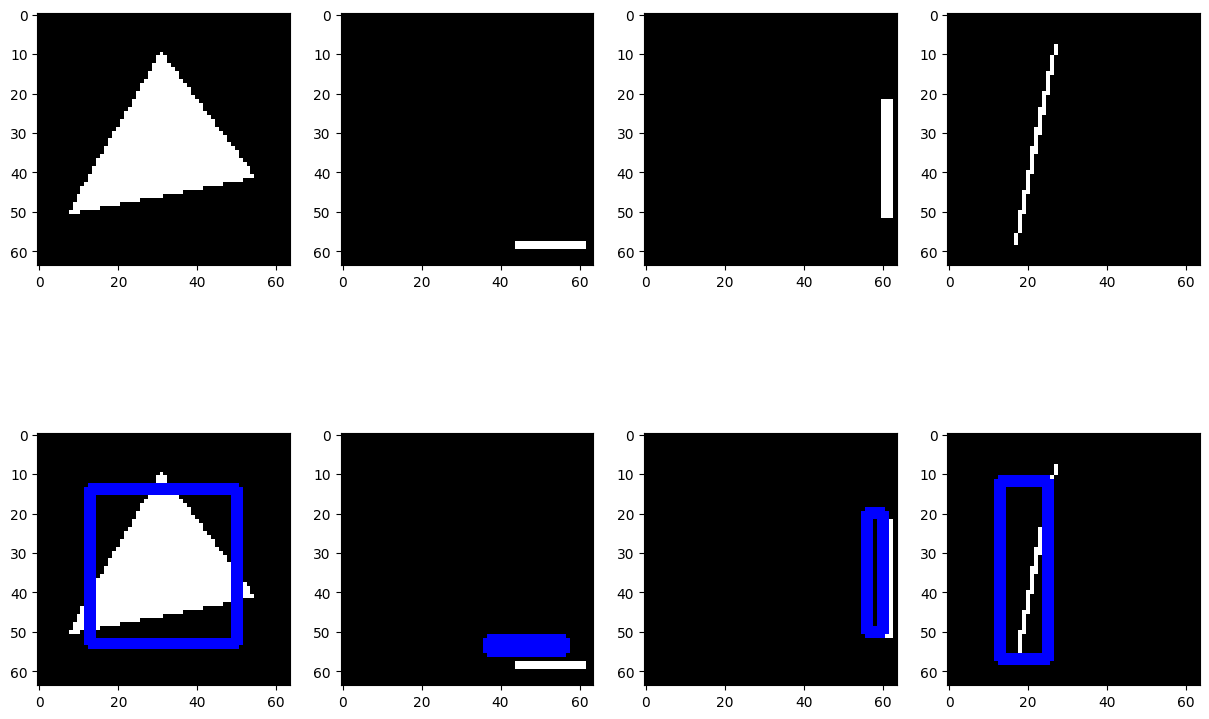

In [5]:
import matplotlib.pyplot as plt

# Choose some test images
num_test_images = 4
test_images = test_data[:num_test_images]

# Make predictions
test_images = np.array([item[0] for item in test_images])
test_labels = np.array([item[1] for item in test_data[:num_test_images]])
predictions = model.predict(test_images)

# Visualization
fig, axes = plt.subplots(2, num_test_images, figsize=(15, 10))
for i in range(num_test_images):

    object_image = test_images[i].copy()
    object_image = cv2.cvtColor(object_image, cv2.COLOR_GRAY2RGB)
    axes[0, i].imshow(object_image)


    x_center_gt, y_center_gt, width_gt, height_gt = test_labels[i]
    x_gt = x_center_gt * image_size
    y_gt = y_center_gt * image_size
    w_gt = width_gt * image_size
    h_gt = height_gt * image_size
    image_with_gt_box = cv2.rectangle(object_image.copy(), (int(x_gt-w_gt/2), int(y_gt-h_gt/2)), (int(x_gt+w_gt/2), int(y_gt+h_gt/2)), (0, 255, 0), 2)
    axes[1, i].imshow(image_with_gt_box)

    # Plot the predicted bounding box
    x_center, y_center, width, height = predictions[i]
    x = x_center * image_size
    y = y_center * image_size
    w = width * image_size
    h = height * image_size
    image_with_box = cv2.rectangle(object_image.copy(), (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (0, 0, 255), 2)
    axes[1, i].imshow(image_with_box)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


IoU for test image 1: 0.65
IoU for test image 2: 0.00
IoU for test image 3: 0.07
IoU for test image 4: 0.57
IoU for test image 5: 0.78
IoU for test image 6: 0.49
IoU for test image 7: 0.11
IoU for test image 8: 0.76
IoU for test image 9: 0.22
IoU for test image 10: 0.88


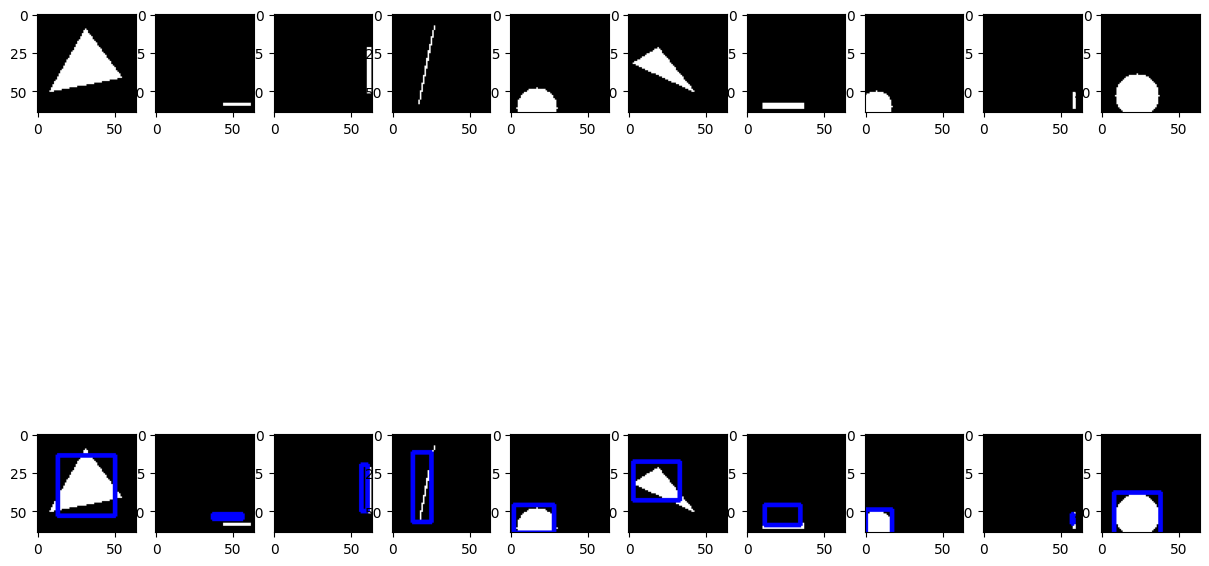

In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# calculate IoU
def calculate_iou(box1, box2):
    poly1 = Polygon([(box1[0], box1[1]), (box1[2], box1[1]), (box1[2], box1[3]), (box1[0], box1[3])])
    poly2 = Polygon([(box2[0], box2[1]), (box2[2], box2[1]), (box2[2], box2[3]), (box2[0], box2[3])])
    iou = poly1.intersection(poly2).area / poly1.union(poly2).area
    return iou

# Choose some test images
num_test_images = 10
test_images = test_data[:num_test_images]

# Make predictions
test_images = np.array([item[0] for item in test_images])
test_labels = np.array([item[1] for item in test_data[:num_test_images]])
predictions = model.predict(test_images)

# Initialize a list to store IoU values
iou_values = []

# Visualization
fig, axes = plt.subplots(2, num_test_images, figsize=(15, 10))
for i in range(num_test_images):
    object_image = test_images[i].copy()
    object_image = cv2.cvtColor(object_image, cv2.COLOR_GRAY2RGB)
    axes[0, i].imshow(object_image)

    x_center_gt, y_center_gt, width_gt, height_gt = test_labels[i]
    x_gt = x_center_gt * image_size
    y_gt = y_center_gt * image_size
    w_gt = width_gt * image_size
    h_gt = height_gt * image_size
    image_with_gt_box = cv2.rectangle(object_image.copy(), (int(x_gt-w_gt/2), int(y_gt-h_gt/2)), (int(x_gt+w_gt/2), int(y_gt+h_gt/2)), (0, 255, 0), 2)
    axes[1, i].imshow(image_with_gt_box)

    x_center, y_center, width, height = predictions[i]
    x = x_center * image_size
    y = y_center * image_size
    w = width * image_size
    h = height * image_size
    image_with_box = cv2.rectangle(object_image.copy(), (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (0, 0, 255), 2)
    axes[1, i].imshow(image_with_box)

    # Calculate IoU
    box1 = (x_gt - w_gt/2, y_gt - h_gt/2, x_gt + w_gt/2, y_gt + h_gt/2)
    box2 = (x - w/2, y - h/2, x + w/2, y + h/2)
    iou = calculate_iou(box1, box2)
    iou_values.append(iou)


for i, iou in enumerate(iou_values):
    print(f"IoU for test image {i + 1}: {iou:.2f}")

plt.show()


In [7]:
mse_values = []

for i in range(num_test_images):
    x_center, y_center, width, height = predictions[i]
    x_gt, y_gt, w_gt, h_gt = test_labels[i]

    mse = ((x_center * image_size - x_gt) ** 2 +
           (y_center * image_size - y_gt) ** 2 +
           (width * image_size - w_gt) ** 2 +
           (height * image_size - h_gt) ** 2) / 4.0

    mse_values.append(mse)
    print(f"MSE for Test Image {i + 1}: {mse:.2f}")


MSE for Test Image 1: 1202.68
MSE for Test Image 2: 1320.37
MSE for Test Image 3: 1349.74
MSE for Test Image 4: 924.15
MSE for Test Image 5: 1043.14
MSE for Test Image 6: 671.56
MSE for Test Image 7: 981.15
MSE for Test Image 8: 998.90
MSE for Test Image 9: 1570.26
MSE for Test Image 10: 1182.94


In [9]:

# Define the MLP model
mlp_model = keras.Sequential([
  layers.Flatten(input_shape = (image_size, image_size)),#Flatten the input
  layers.Dense(128, activation='relu'), # First hidden layer
  layers.Dense(64, activation='relu'), # Second hidden layer
  layers.Dense(4, activation='softmax') # Output layer for classification
])

# Compile
opt = keras.optimizers.Adam(learning_rate=0.0005)
mlp_model.compile(optimizer=opt, loss='mse')

# Prepare training data
train_images = np.array([item[0] for item in train_data])
train_labels = np.array([item[1] for item in train_data])

# Prepare testing data
test_images = np.array([item[0] for item in test_data])
test_labels = np.array([item[1] for item in test_data])

# Train the model
mlp_model.fit(train_images, train_labels, epochs = 10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = mlp_model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0958 - val_loss: 0.0876
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0774 - val_loss: 0.0841
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0730 - val_loss: 0.0819
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0656 - val_loss: 0.0796
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0703 - val_loss: 0.0783
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0650 - val_loss: 0.0769
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0650 - val_loss: 0.0766
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0622 - val_loss: 0.0757
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0607 - val_loss: 0.0752
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0613 - val_loss: 0.0745
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0749  
Test loss: 0.07002126425504684


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


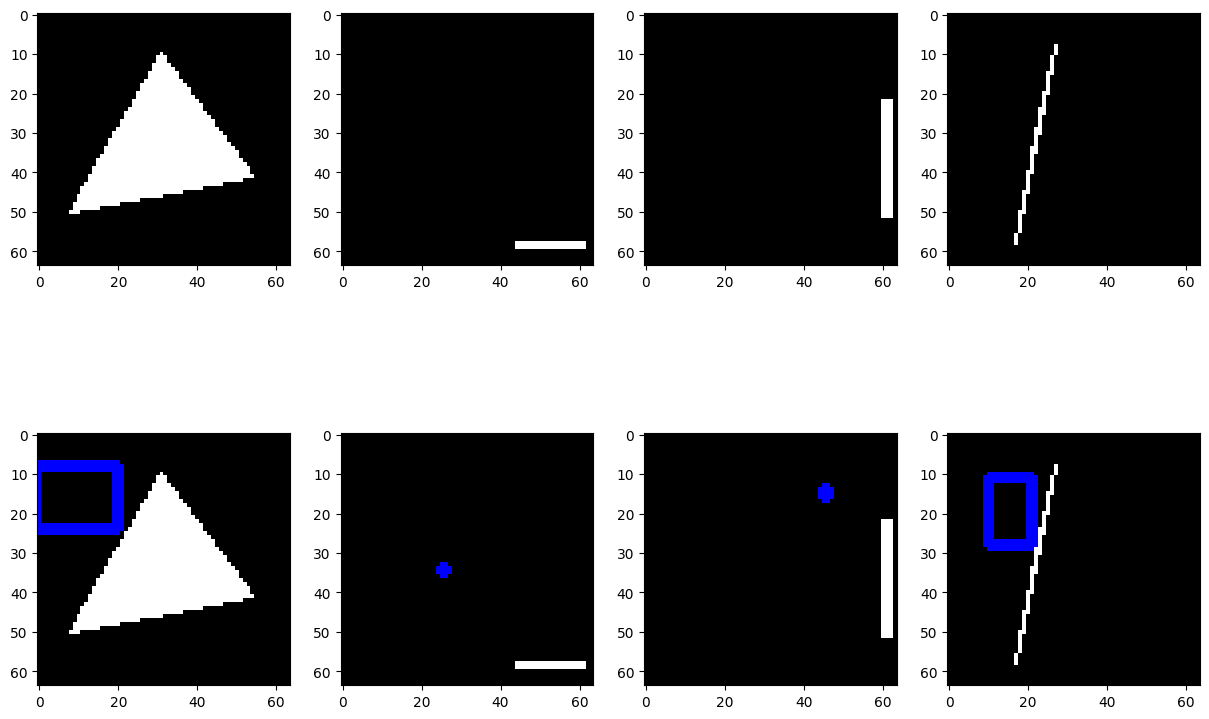

In [10]:
import matplotlib.pyplot as plt
import cv2

# Choose some test images
num_test_images = 4
test_images = test_data[:num_test_images]

# Make predictions using the MLP model (mlp_model)
test_images = np.array([item[0] for item in test_images])
test_labels = np.array([item[1] for item in test_data[:num_test_images]])
mlp_predictions = mlp_model.predict(test_images)

# Visualization
fig, axes = plt.subplots(2, num_test_images, figsize=(15, 10))
for i in range(num_test_images):
    object_image = test_images[i].copy()
    object_image = cv2.cvtColor(object_image, cv2.COLOR_GRAY2RGB)
    axes[0, i].imshow(object_image)

    x_center_gt, y_center_gt, width_gt, height_gt = test_labels[i]
    x_gt = x_center_gt * image_size
    y_gt = y_center_gt * image_size
    w_gt = width_gt * image_size
    h_gt = height_gt * image_size
    image_with_gt_box = cv2.rectangle(object_image.copy(), (int(x_gt-w_gt/2), int(y_gt-h_gt/2)), (int(x_gt+w_gt/2), int(y_gt+h_gt/2)), (0, 255, 0), 2)
    axes[1, i].imshow(image_with_gt_box)

    # Plot the predicted bounding box for MLP
    x_center_mlp, y_center_mlp, width_mlp, height_mlp = mlp_predictions[i]
    x_mlp = x_center_mlp * image_size
    y_mlp = y_center_mlp * image_size
    w_mlp = width_mlp * image_size
    h_mlp = height_mlp * image_size
    image_with_box_mlp = cv2.rectangle(object_image.copy(), (int(x_mlp-w_mlp/2), int(y_mlp-h_mlp/2)), (int(x_mlp+w_mlp/2), int(y_mlp+h_mlp/2)), (0, 0, 255), 2)
    axes[1, i].imshow(image_with_box_mlp)

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


IoU for MLP test image 1: 0.09
IoU for MLP test image 2: 0.00
IoU for MLP test image 3: 0.00
IoU for MLP test image 4: 0.11
IoU for MLP test image 5: 0.00
IoU for MLP test image 6: 0.12
IoU for MLP test image 7: 0.00
IoU for MLP test image 8: 0.00
IoU for MLP test image 9: 0.00
IoU for MLP test image 10: 0.00


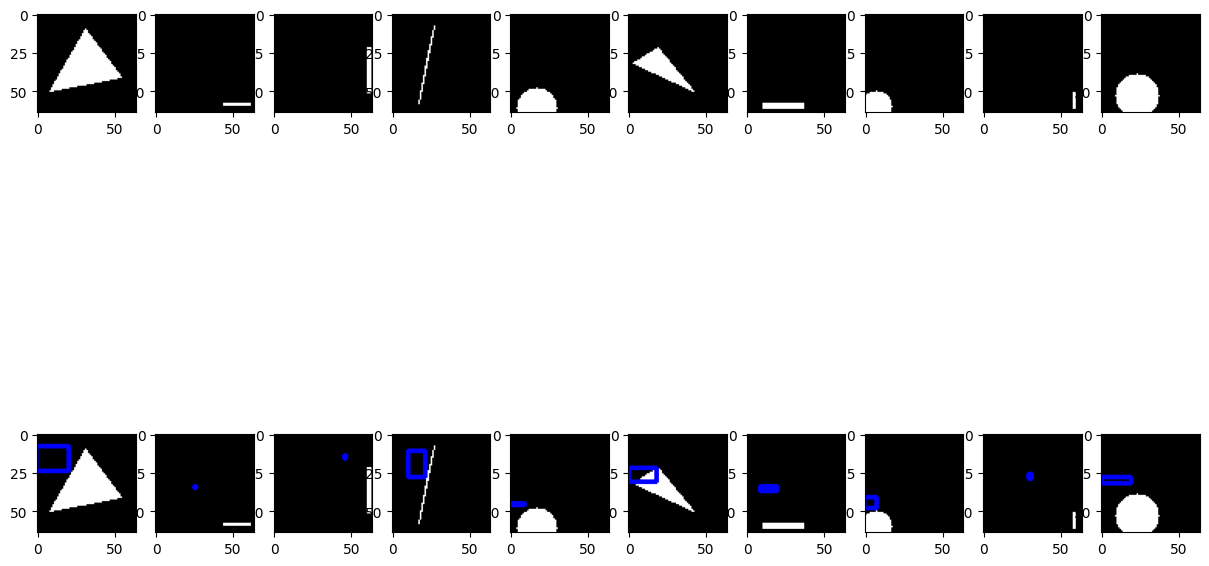

In [11]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# calculate IoU
def calculate_iou(box1, box2):
    poly1 = Polygon([(box1[0], box1[1]), (box1[2], box1[1]), (box1[2], box1[3]), (box1[0], box1[3])])
    poly2 = Polygon([(box2[0], box2[1]), (box2[2], box2[1]), (box2[2], box2[3]), (box2[0], box2[3])])
    iou = poly1.intersection(poly2).area / poly1.union(poly2).area
    return iou

# Choose some test images
num_test_images = 10
test_images = test_data[:num_test_images]

# Make predictions using the MLP model (mlp_model)
test_images = np.array([item[0] for item in test_images])
test_labels = np.array([item[1] for item in test_data[:num_test_images]])
mlp_predictions = mlp_model.predict(test_images)

# Initialize a list to store IoU values
iou_values_mlp = []

# Visualization
fig, axes = plt.subplots(2, num_test_images, figsize=(15, 10))
for i in range(num_test_images):
    object_image = test_images[i].copy()
    object_image = cv2.cvtColor(object_image, cv2.COLOR_GRAY2RGB)
    axes[0, i].imshow(object_image)

    x_center_gt, y_center_gt, width_gt, height_gt = test_labels[i]
    x_gt = x_center_gt * image_size
    y_gt = y_center_gt * image_size
    w_gt = width_gt * image_size
    h_gt = height_gt * image_size
    image_with_gt_box = cv2.rectangle(object_image.copy(), (int(x_gt-w_gt/2), int(y_gt-h_gt/2)), (int(x_gt+w_gt/2), int(y_gt+h_gt/2)), (0, 255, 0), 2)
    axes[1, i].imshow(image_with_gt_box)

    x_center_mlp, y_center_mlp, width_mlp, height_mlp = mlp_predictions[i]
    x_mlp = x_center_mlp * image_size
    y_mlp = y_center_mlp * image_size
    w_mlp = width_mlp * image_size
    h_mlp = height_mlp * image_size
    image_with_box_mlp = cv2.rectangle(object_image.copy(), (int(x_mlp-w_mlp/2), int(y_mlp-h_mlp/2)), (int(x_mlp+w_mlp/2), int(y_mlp+h_mlp/2)), (0, 0, 255), 2)
    axes[1, i].imshow(image_with_box_mlp)

    # Calculate IoU for MLP
    box1 = (x_gt - w_gt/2, y_gt - h_gt/2, x_gt + w_gt/2, y_gt + h_gt/2)
    box2 = (x_mlp - w_mlp/2, y_mlp - h_mlp/2, x_mlp + w_mlp/2, y_mlp + h_mlp/2)
    iou_mlp = calculate_iou(box1, box2)
    iou_values_mlp.append(iou_mlp)

# Print IoU values for MLP
for i, iou in enumerate(iou_values_mlp):
    print(f"IoU for MLP test image {i + 1}: {iou:.2f}")

plt.show()


In [12]:
mse_values_mlp = []

for i in range(num_test_images):
    x_center_mlp, y_center_mlp, width_mlp, height_mlp = mlp_predictions[i]
    x_gt, y_gt, w_gt, h_gt = test_labels[i]

    mse_mlp = ((x_center_mlp * image_size - x_gt) ** 2 +
               (y_center_mlp * image_size - y_gt) ** 2 +
               (width_mlp * image_size - w_gt) ** 2 +
               (height_mlp * image_size - h_gt) ** 2) / 4.0

    mse_values_mlp.append(mse_mlp)
    print(f"MSE for MLP Test Image {i + 1}: {mse_mlp:.2f}")


MSE for MLP Test Image 1: 255.00
MSE for MLP Test Image 2: 455.85
MSE for MLP Test Image 3: 564.94
MSE for MLP Test Image 4: 252.61
MSE for MLP Test Image 5: 560.38
MSE for MLP Test Image 6: 297.01
MSE for MLP Test Image 7: 379.96
MSE for MLP Test Image 8: 521.97
MSE for MLP Test Image 9: 412.23
MSE for MLP Test Image 10: 339.70
